<a href="https://colab.research.google.com/github/aymnblh/AI/blob/main/Unsupervised_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
path="/content/Mall_Customers.csv"
data=pd.read_csv(path)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [63]:
data['Gender'].replace(['Female','Male'],[0,1],inplace=True)

Agglomerative Example

In [64]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

Agglomerative label
After we finished creating our clusters, we can print each point’s corresponding cluster


In [65]:
data["agglomerative"]=pd.DataFrame(clust_labels)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),agglomerative
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


Agglomerative cluster plot

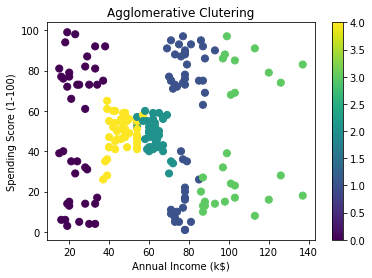

In [66]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

Dendrogram Example

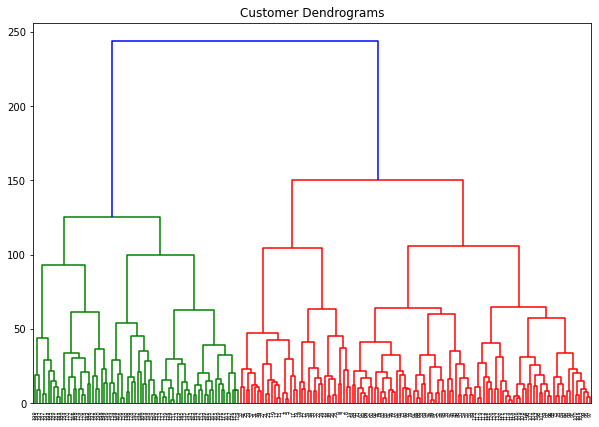

In [67]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

K-means Example

In [68]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

K-means Labels

In [69]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,0
2,4
3,0
4,4
...,...
195,3
196,1
197,3
198,1


K-means Centroids

In [70]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[ 23.04166667   0.41666667  25.25        25.83333333  76.91666667
    0.33333333]
 [164.           0.52777778  40.80555556  87.91666667  17.88888889
    1.97222222]
 [ 93.04615385   0.43076923  42.96923077  57.93846154  49.44615385
    2.73846154]
 [162.           0.46153846  32.69230769  86.53846154  82.12820513
    1.51282051]
 [ 35.47222222   0.36111111  45.19444444  32.94444444  31.47222222
    2.        ]]


In [71]:
data['label']=labels
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),agglomerative,label
0,1,1,19,15,39,0,0
1,2,1,21,15,81,0,0
2,3,0,20,16,6,0,4
3,4,0,23,16,77,0,0
4,5,0,31,17,40,0,4


K-means plot
Plot containing the clusters.

Each colored group represents a cluster.

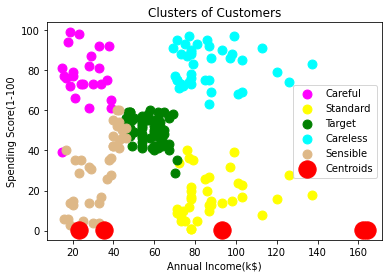

In [72]:
plt.scatter(data["Annual Income (k$)"][data.label == 0],
            data["Spending Score (1-100)"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["Annual Income (k$)"][data.label == 1],
           data["Spending Score (1-100)"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["Annual Income (k$)"][data.label == 2],
           data["Spending Score (1-100)"][data.label == 2],s=80,c='green',label='Target')
plt.scatter(data["Annual Income (k$)"][data.label == 3], 
           data["Spending Score (1-100)"][data.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["Annual Income (k$)"][data.label == 4], 
           data["Spending Score (1-100)"][data.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()